In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                                    '''Practice File Case Study'''

In [2]:
#To read the file 
df=pd.read_csv(r'D:\Class\PYTHON\Python\2. Python class\21. Case study\practice.csv')
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn
3,70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av


In [8]:
#shape
df.shape

(30, 11)

In [9]:
df.describe()

,MSSubClass,LotArea,OverallQual,YearBuilt,MasVnrArea
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,45.000000,10257.700000,6.300000,1973.033333,120.633333
std,37.278079,2956.543883,1.393334,29.135218,162.790427
min,20.000000,4224.000000,4.000000,1915.000000,0.000000
25%,20.000000,7731.500000,5.000000,1957.250000,0.000000
50%,25.000000,10517.000000,6.500000,1971.500000,0.000000
75%,60.000000,11812.500000,7.000000,2002.750000,209.000000
max,190.000000,16321.000000,9.000000,2007.000000,640.000000


In [16]:
#creating numerical and categorical column in table

numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'MasVnrArea'], dtype='object')

In [18]:
categorical_columns = df.select_dtypes(include=[np.object]).columns
print(categorical_columns)

Index(['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'ExterQual',
       'BsmtExposure'],
      dtype='object')


C:\Users\admin\AppData\Local\Temp\ipykernel_13872\301856511.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = df.select_dtypes(include=[np.object]).columns


In [4]:
#Rename calumn MSSubClass --> Subclass : MSZoning --> Zones [inplace = changes into the original dataframe]
df.rename(columns={"MSSubClass" : "Subclass","MSZoning" : "Zones"},inplace=True)
df.head()

,Subclass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn
3,70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av


In [24]:
#to find the unique values in the column
df["Zones"].unique()

#To find the count of distinct values in the column
df["LotConfig"].nunique()

4

In [28]:
#Max and min of yearbuilt

print(df.YearBuilt.min(),df.YearBuilt.max())

1915 2007


In [7]:
#Adding the column to the data table

df['Year_Diff']=2023-df['YearBuilt']

In [23]:
df.head(10)

,Subclass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,Year_Diff
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,Gd,No,20
1,20,RL,9600,Reg,FR2,Gtl,6,1976,0,TA,Gd,47
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Gd,Mn,22
3,70,RL,9550,IR1,Corner,Gtl,7,1915,0,TA,No,108
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Gd,Av,23
5,50,RL,14115,IR1,Inside,Gtl,5,1993,0,TA,No,30
6,20,RL,10084,Reg,Inside,Gtl,8,2004,186,Gd,Av,19
7,60,RL,10382,IR1,Corner,Gtl,7,1973,240,TA,Mn,50
8,50,RM,6120,Reg,Inside,Gtl,7,1931,0,TA,No,92
9,190,RL,7420,Reg,Corner,Gtl,5,1939,0,TA,No,84


In [11]:
#display distinct from each overallqual

df.groupby('OverallQual')['Zones'].unique()

OverallQual
4    [RL, RM]
5    [RL, RM]
6        [RL]
7    [RL, RM]
8        [RL]
9        [RL]
Name: Zones, dtype: object

In [21]:
#what is the maximum LotArea where BsmtExposure = Mn?

df[df['BsmtExposure']=='Mn']['LotArea'].max()

11250

In [22]:
#LotArea where BsmtExposure = Mn?

df[df['BsmtExposure']=='Mn']['LotArea']

2     11250
7     10382
24     8246
26     7200
Name: LotArea, dtype: int64

In [27]:
#Sort values based on following columns [YearBuilt:descending Subclass:ascending]

df.sort_values(by=['Subclass','YearBuilt'],ascending=[True,False]).head()

,Subclass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,ExterQual,BsmtExposure,Year_Diff
25,20,RL,14230,Reg,Corner,Gtl,8,2007,640,Gd,No,16
27,20,RL,11478,Reg,Inside,Gtl,8,2007,200,Gd,No,16
13,20,RL,10652,IR1,Inside,Gtl,7,2006,306,Gd,Av,17
6,20,RL,10084,Reg,Inside,Gtl,8,2004,186,Gd,Av,19
18,20,RL,13695,Reg,Inside,Gtl,5,2004,0,TA,No,19


In [37]:
#Group by YearBuilt and find maximum OverallQual

df.groupby('YearBuilt')['OverallQual'].max().head(10)

YearBuilt
1915    7
1927    4
1929    7
1930    7
1931    7
1939    5
1951    5
1957    5
1958    5
1960    6
Name: OverallQual, dtype: int64

In [45]:
#what is the Average of OverallQual
df['OverallQual'].mean()

6.3

In [41]:
#replacing the values in columns[MasVnrArea]
df['MasVnrArea']=df['MasVnrArea'].replace(0,-2)
df['MasVnrArea'].head()

0    196
1     -2
2    162
3     -2
4    350
Name: MasVnrArea, dtype: int64

In [46]:
#To check any null values (NaN) in the data given
df.isnull().sum()

Subclass        0
Zones           0
LotArea         0
LotShape        0
LotConfig       0
LandSlope       0
OverallQual     0
YearBuilt       0
MasVnrArea      0
ExterQual       0
BsmtExposure    1
Year_Diff       0
dtype: int64

In [48]:
#To displayb the missing values percentage based on columns

round(df.isnull().sum()/len(df)*100,2)

Subclass        0.00
Zones           0.00
LotArea         0.00
LotShape        0.00
LotConfig       0.00
LandSlope       0.00
OverallQual     0.00
YearBuilt       0.00
MasVnrArea      0.00
ExterQual       0.00
BsmtExposure    3.33
Year_Diff       0.00
dtype: float64

In [57]:
#To make the new dataframe with numeric columns

df.select_dtypes(include=np.number).head(5)

,Subclass,LotArea,OverallQual,YearBuilt,MasVnrArea,Year_Diff
0,60,8450,7,2003,196,20
1,20,9600,6,1976,-2,47
2,60,11250,7,2001,162,22
3,70,9550,7,1915,-2,108
4,60,14260,8,2000,350,23


In [58]:
#To make the new dataframe with string columns

df.select_dtypes(exclude=np.number).head(5)
                #OR
#df.select_dtypes(include=np.object).head(5)

,Zones,LotShape,LotConfig,LandSlope,ExterQual,BsmtExposure
0,RL,Reg,Inside,Gtl,Gd,No
1,RL,Reg,FR2,Gtl,TA,Gd
2,RL,IR1,Inside,Gtl,Gd,Mn
3,RL,IR1,Corner,Gtl,TA,No
4,RL,IR1,FR2,Gtl,Gd,Av


In [60]:
#Drop the column 
df.drop('ExterQual',axis=1,inplace=False).head()

,Subclass,Zones,LotArea,LotShape,LotConfig,LandSlope,OverallQual,YearBuilt,MasVnrArea,BsmtExposure,Year_Diff
0,60,RL,8450,Reg,Inside,Gtl,7,2003,196,No,20
1,20,RL,9600,Reg,FR2,Gtl,6,1976,-2,Gd,47
2,60,RL,11250,IR1,Inside,Gtl,7,2001,162,Mn,22
3,70,RL,9550,IR1,Corner,Gtl,7,1915,-2,No,108
4,60,RL,14260,IR1,FR2,Gtl,8,2000,350,Av,23


In [62]:
#Group data in LotShape and find average in LotArea

df.groupby('LotShape')['LotArea'].mean()

LotShape
IR1    11492.307692
IR2    12968.000000
Reg     9085.187500
Name: LotArea, dtype: float64

In [64]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2'], dtype=object)

                                        '''Titanic Dataset Case Study'''

In [68]:
#read file
dt = pd.read_csv(r'D:\Class\PYTHON\Python\2. Python class\21. Case study\datasetTitanic.csv')

In [69]:
dt.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [75]:
#Find amount of alive based on sex
dt.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [76]:
#Find the alive percentage based on sex
round(dt.groupby('Sex')['Survived'].sum()/len(dt)*100,2)

Sex
female    26.27
male      12.29
Name: Survived, dtype: float64

In [81]:
dt.groupby('Sex')['Sex'].count()

Sex
female    314
male      573
Name: Sex, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_15000\2664159977.py:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(dt,labels=['Death','Alive'])


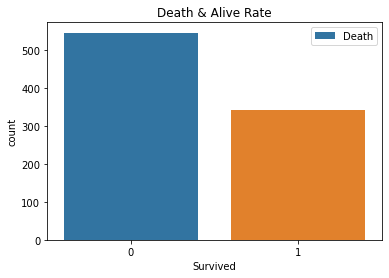

In [91]:
#Plot the Death & Alive Rate  
sns.countplot(dt['Survived'])
plt.title('Death & Alive Rate')
plt.legend(dt,labels=['Death','Alive'])
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

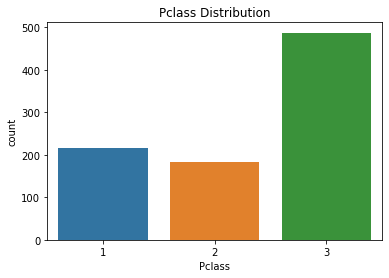

In [96]:
#plot the pclass distribution
sns.countplot(dt['Pclass'])
plt.title('Pclass Distribution')
plt.show

In [100]:
#create a new column which hold string length

dt['Name_len']=dt['Name'].apply(lambda x:len(x)-len(' '))
dt.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,21
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,49
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,20
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,42
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,22


In [104]:
#To insert the new row in the existing dataframe
dt1=dt.append({'Survived':1,'Pclass':2,'Name':'Naresh'},ignore_index=True)
dt1.tail()

C:\Users\admin\AppData\Local\Temp\ipykernel_15000\2108284150.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt1=dt.append({'Survived':1,'Pclass':2,'Name':'Naresh'},ignore_index=True)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Name_len
883,1,1,Miss. Margaret Edith Graham,female,19.0,0.0,0.0,30.00,26.0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1.0,2.0,23.45,29.0
885,1,1,Mr. Karl Howell Behr,male,26.0,0.0,0.0,30.00,19.0
886,0,3,Mr. Patrick Dooley,male,32.0,0.0,0.0,7.75,17.0
887,1,2,Naresh,NaN,NaN,NaN,NaN,NaN,NaN


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


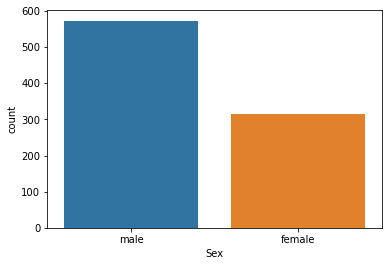

In [105]:
#plot distribution based on sex
sns.countplot(dt['Sex'])
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Temp\ipykernel_15000\2674247945.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(dt,labels=['Death','Alive'])


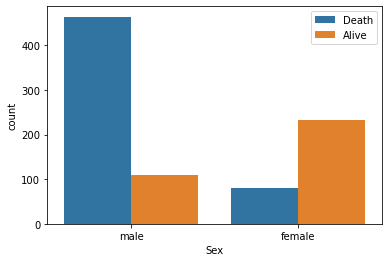

In [107]:
#plot distribution based on sex
'''order, hue_order : lists of strings, optional
    Order to plot the categorical levels in, otherwise the levels are
    inferred from the data objects. '''
sns.countplot(dt['Sex'],hue=dt['Survived'])
plt.legend(dt,labels=['Death','Alive'])
plt.show()

In [125]:
#Finding the percentage of male and female
'''To find number of male & Female'''
#len(dt[dt['Sex']=='male'])
#len(dt[dt['Sex']=='female'])

print('Male : {} %'.format( round (len(dt[dt['Sex']=='male'])/len(dt)*100,0)))
print('Female : {} %'.format( round (len(dt[dt['Sex']=='female'])/len(dt)*100,0)))

Male : 65.0 %
Female : 35.0 %


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


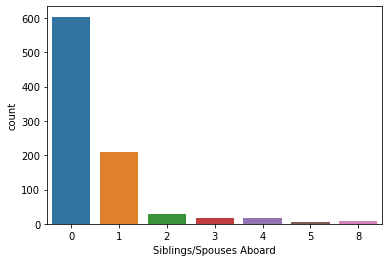

In [128]:
#plot the Siblings/Spouses Aboard distribution
sns.countplot(dt['Siblings/Spouses Aboard'])
plt.show()

In [129]:
#To displayb the missing values based on columns

dt.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Name_len                   0
dtype: int64

In [151]:
#ratio of survived and non-survived passenger
print('ratio: {} %'.format( round( (dt[dt['Survived']==1].shape[0]/dt[dt['Survived']==0].shape[0])*100,0)))

ratio: 63.0 %


In [152]:
#Alive percentage?
print('ratio: {} %'.format( round( (dt[dt['Survived']==1].shape[0]/dt['Survived'].shape[0])*100,2)))

ratio: 38.56 %
